TERNAUS


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import Sequence
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam

# Load training data
train_images = np.load('/content/drive/MyDrive/Robo_final/Prepocessed numpy/train_images.npy')
train_binary_masks = np.load('/content/drive/MyDrive/Robo_final/Prepocessed numpy/train_binary_masks.npy')
print("Training data loaded")

Training data loaded


In [3]:
# Load Val data
val_images = np.load('/content/drive/MyDrive/Robo_final/Prepocessed numpy/val_images.npy')
val_binary_masks = np.load('/content/drive/MyDrive/Robo_final/Prepocessed numpy/val_binary_masks.npy')
print("Validation data loaded")

Validation data loaded


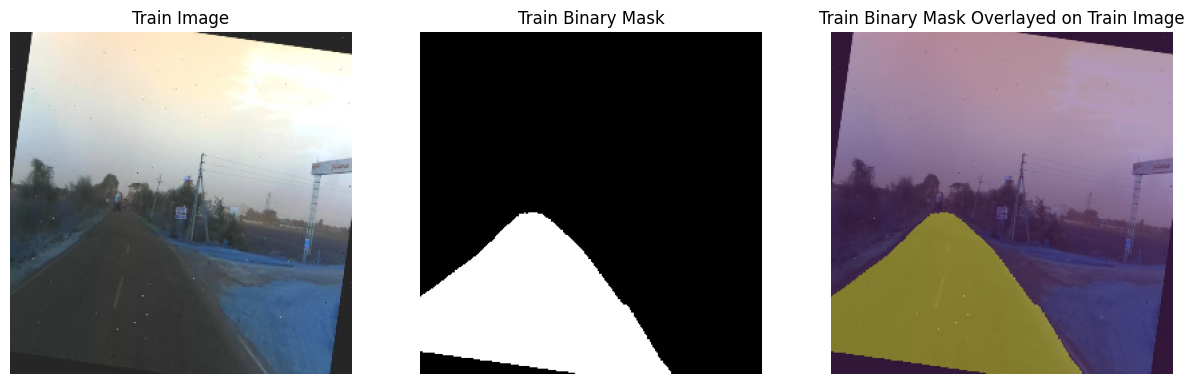

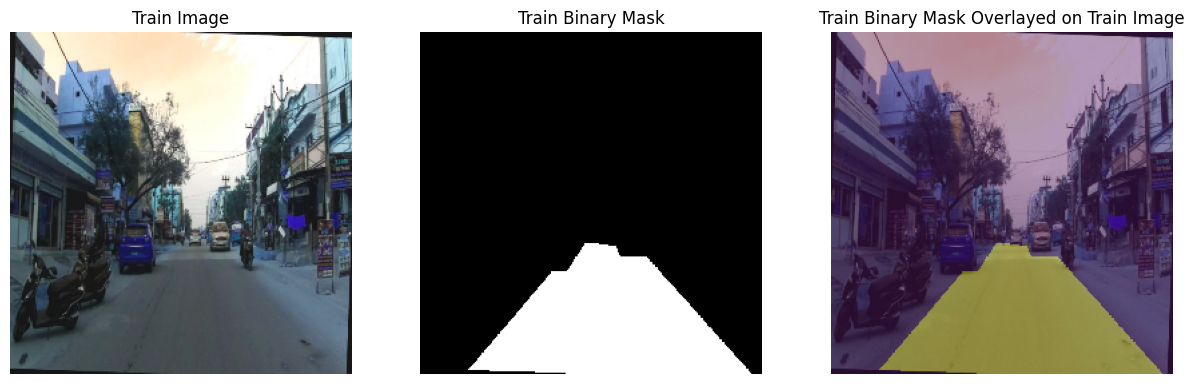

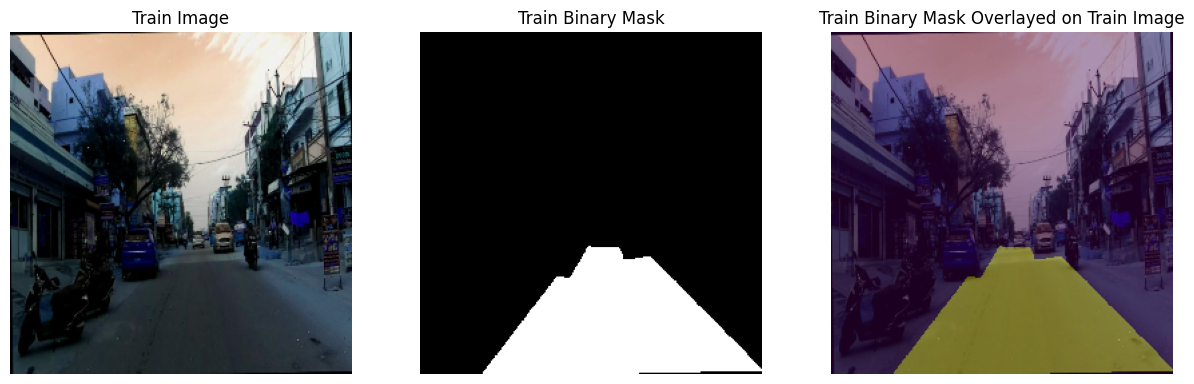

In [4]:


# Visualize some training images and masks
for index in [0, 2, 3]:
    plt.figure(figsize=(15, 7))
    plt.subplot(1, 3, 1)
    plt.imshow(train_images[index])
    plt.title('Train Image')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(train_binary_masks[index], cmap='gray')
    plt.title('Train Binary Mask')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(train_binary_masks[index])
    plt.imshow(train_images[index], alpha=0.6)
    plt.title('Train Binary Mask Overlayed on Train Image')
    plt.axis('off')

In [5]:
# Data generator class
class CustomDataGenerator(Sequence):
    def __init__(self, images, masks, batch_size):
        self.images = images
        self.masks = masks
        self.batch_size = batch_size

    def __len__(self):
        return len(self.images) // self.batch_size

    def __getitem__(self, idx):
        batch_images = self.images[idx * self.batch_size : (idx + 1) * self.batch_size]
        batch_masks = self.masks[idx * self.batch_size : (idx + 1) * self.batch_size]

        return batch_images, batch_masks

# Create generator
train_generator = CustomDataGenerator(train_images, train_binary_masks, batch_size=16)
val_generator = CustomDataGenerator(val_images, val_binary_masks, batch_size=2)


In [6]:
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Load the trained TernausNet model
ternaus = load_model('/content/drive/MyDrive/Honours project/trained_ternaus_latest1.h5')
print("Trained model loaded")

# Recompile the model with a new optimizer and metrics
ternaus.compile(
    optimizer=Adam(),  # Default learning rate for Adam optimizer
    loss='binary_crossentropy',  # Use binary crossentropy for binary classification
    metrics=['accuracy', 'Precision', 'AUC', 'binary_accuracy', 'Recall']  # Include relevant metrics
)
print("Model recompiled")

# Define EarlyStopping callback based on validation recall
early_stopping = EarlyStopping(
    monitor='val_recall',        # Monitor recall on the validation set
    patience=5,                  # Stop after 5 epochs without improvement
    verbose=1,                   # Print messages when early stopping occurs
    mode='max',                  # 'max' means training stops when recall stops increasing
    restore_best_weights=True    # Restore the best model weights
)

# Define ModelCheckpoint callback
checkpoint_filepath = '/content/drive/MyDrive/Robo_final/new_trained_ternaus_lat.keras'
model_checkpoint = ModelCheckpoint(
    filepath=checkpoint_filepath,  # Save path for the model
    monitor='val_loss',            # Monitor validation loss
    save_best_only=True,           # Save only the best model based on validation loss
    save_weights_only=False,       # Save the entire model (not just weights)
    verbose=1                      # Print a message when saving the model
)

# Train the model with both EarlyStopping and ModelCheckpoint callbacks
ternaus.fit(
    train_generator,               # Training data generator
    epochs=50,                    # Maximum number of epochs
    validation_data=val_generator, # Validation data generator
    callbacks=[early_stopping, model_checkpoint]  # List of callbacks
)

print("Training completed")


Trained model loaded
Model recompiled
Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 682ms/step - AUC: 0.8594 - Precision: 0.8219 - Recall: 0.6191 - accuracy: 0.8695 - binary_accuracy: 0.8695 - loss: 0.8695
Epoch 1: val_loss improved from inf to 0.13419, saving model to /content/drive/MyDrive/Robo_final/new_trained_ternaus_lat.keras


/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_recall` which is not available. Available metrics are: AUC,Precision,Recall,accuracy,binary_accuracy,loss,val_AUC,val_Precision,val_Recall,val_accuracy,val_binary_accuracy,val_loss
  current = self.get_monitor_value(logs)


150/150 ━━━━━━━━━━━━━━━━━━━━ 203s 825ms/step - AUC: 0.8599 - Precision: 0.8222 - Recall: 0.6203 - accuracy: 0.8698 - binary_accuracy: 0.8698 - loss: 0.8661 - val_AUC: 0.9860 - val_Precision: 0.9046 - val_Recall: 0.8943 - val_accuracy: 0.9455 - val_binary_accuracy: 0.9455 - val_loss: 0.1342
Epoch 2/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 694ms/step - AUC: 0.9880 - Precision: 0.9081 - Recall: 0.9064 - accuracy: 0.9513 - binary_accuracy: 0.9513 - loss: 0.1218
Epoch 2: val_loss improved from 0.13419 to 0.11528, saving model to /content/drive/MyDrive/Robo_final/new_trained_ternaus_lat.keras
150/150 ━━━━━━━━━━━━━━━━━━━━ 124s 767ms/step - AUC: 0.9880 - Precision: 0.9081 - Recall: 0.9065 - accuracy: 0.9513 - binary_accuracy: 0.9513 - loss: 0.1218 - val_AUC: 0.9894 - val_Precision: 0.9076 - val_Recall: 0.9253 - val_accuracy: 0.9540 - val_binary_accuracy: 0.9540 - val_loss: 0.1153
Epoch 3/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 692ms/step - AUC: 0.9922 - Precision: 0.9220 - Recall: 0.9288 - accuracy: 0.96

KeyboardInterrupt: 